Importing the dependencies

In [ ]:
import numpy as nump
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


Data Collection and Analysis

In [ ]:
# loading text from csv file to Pandas Dataframe
big_mart_data =pd.read_csv('/content/test.csv')
# first five rows of Dataframe
big_mart_data.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
# number of data points and features
big_mart_data.shape


(5681, 11)

In [ ]:
# getting some information about the dataset
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


Categorical features:
Item_Identifier
Item_Weight 
Item_Fat_Content 
Item_Visibility  
Item_Type
Item_MRP
Outlet_Identifier 
Outlet_Establishment_Year
Outlet_Size
Outlet_Location_Type 
Outlet_Type  










In [ ]:
#checking for missing values
big_mart_data.isnull().sum()


Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

 # Handling missing values
 

Mean -->average value
Mode -->most repeated value

In [ ]:
# mean value of Item_weight column
big_mart_data['Item_Weight'].mean()

12.695633368756374

In [ ]:
# filling the missing values in "Item_Weight" column with mean value
big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(),inplace=True)

In [ ]:
big_mart_data.isnull().sum()


Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

Replacing the missing values in "Outlet_Size" with mode

In [ ]:
mode_of_Outlet_Size = big_mart_data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x : x.mode()[0]))

In [ ]:
print(mode_of_Outlet_Size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [ ]:
missing_values=big_mart_data['Outlet_Size'].isnull()


In [ ]:
print(missing_values)

0       False
1        True
2        True
3        True
4       False
        ...  
5676    False
5677    False
5678     True
5679     True
5680     True
Name: Outlet_Size, Length: 5681, dtype: bool


In [ ]:
big_mart_data.loc[missing_values,'Outlet_Size'] = big_mart_data.loc[missing_values,'Outlet_Type'].apply(lambda x: mode_of_outlet_size[x])




NameError: ignored

In [ ]:
big_mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

Data Analysis

In [ ]:
# statistical measures about the data
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.245189,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,9.195000,0.027047,94.412000,1987.000000
50%,12.695633,0.054154,141.415400,1999.000000
75%,15.850000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


Numerical Features

In [ ]:
sns.set()

<Figure size 432x432 with 0 Axes>

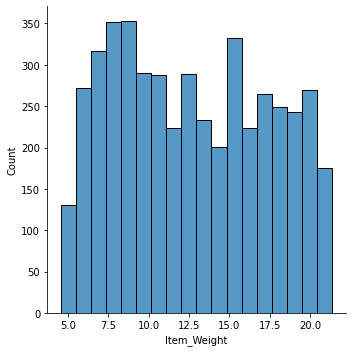

In [ ]:
#Item_Weight distribution
plt.figure(figsize=(6,6))
sns.displot(big_mart_data['Item_Weight'])

<Figure size 432x432 with 0 Axes>

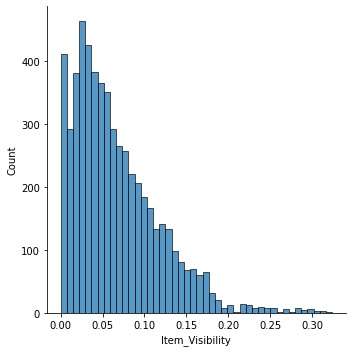

In [ ]:
#Item_Visibility distribution
plt.figure(figsize=(6,6))
sns.displot(big_mart_data['Item_Visibility'])

<Figure size 432x432 with 0 Axes>

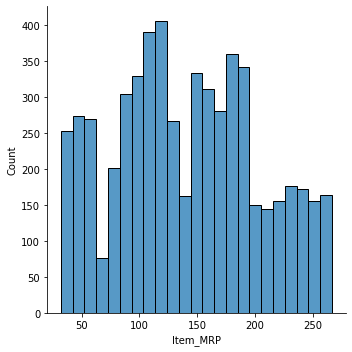

In [ ]:
#Item_MRP distribution
plt.figure(figsize=(6,6))
sns.displot(big_mart_data['Item_MRP'])

<Figure size 432x432 with 0 Axes>

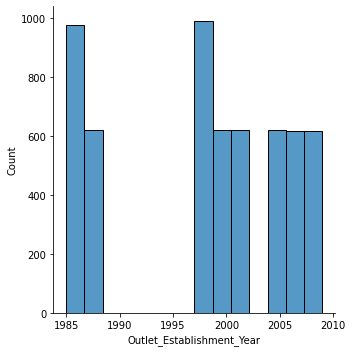

In [ ]:
#Outlet_Establishment_Year distribution
plt.figure(figsize=(6,6))
sns.displot(big_mart_data['Outlet_Establishment_Year'])

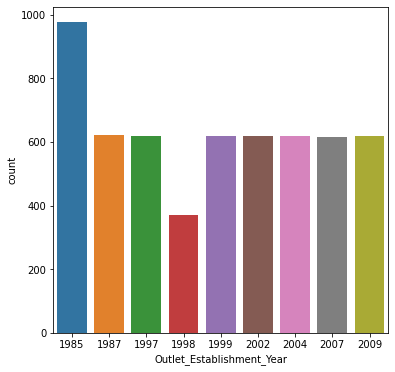

In [ ]:
# Outllet_Establishment_Year
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year',data=big_mart_data)
plt.show()

Categorical features

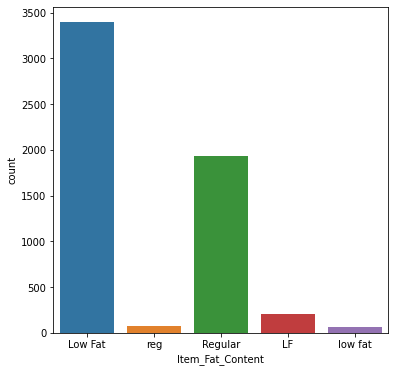

In [ ]:
#Item_Fat_Content column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content',data=big_mart_data)
plt.show()

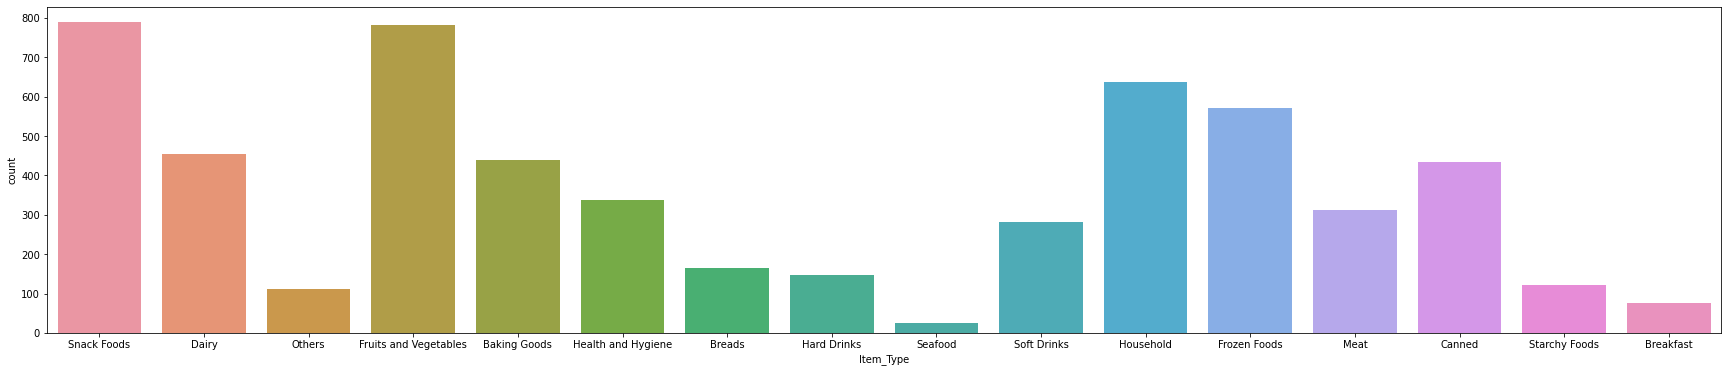

In [ ]:
#Item_Type column
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type',data=big_mart_data)
plt.show()

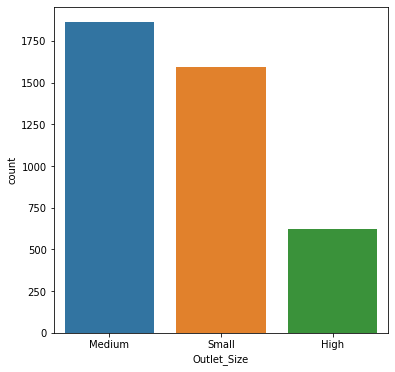

In [ ]:
# Outlet_Size column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size',data=big_mart_data)
plt.show()

Data Pre-Processing

In [ ]:
big_mart_data.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [ ]:
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

LabelEncoding


In [ ]:
encoder=LabelEncoder()

In [ ]:
big_mart_data['Item_Identifier'] = encoder.fit_transform(big_mart_data['Item_Identifier'])
big_mart_data['Item_Fat_Content'] = encoder.fit_transform(big_mart_data['Item_Fat_Content'])
big_mart_data['Item_Type'] = encoder.fit_transform(big_mart_data['Item_Type'])
big_mart_data['Outlet_Size'] = encoder.fit_transform(big_mart_data['Outlet_Size'])
big_mart_data['Outlet_Location_Type'] = encoder.fit_transform(big_mart_data['Outlet_Location_Type'])
big_mart_data['Outlet_Type'] = encoder.fit_transform(big_mart_data['Outlet_Type'])

In [ ]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750,1,0.007565,13,107.8622,OUT049,1999,1,0,1
1,1067,8.300,4,0.038428,4,87.3198,OUT017,2007,3,1,1
2,1406,14.600,1,0.099575,11,241.7538,OUT010,1998,3,2,0
3,809,7.315,1,0.015388,13,155.0340,OUT017,2007,3,1,1
4,1184,NaN,2,0.118599,4,234.2300,OUT027,1985,1,2,3


Splitting features and target

In [ ]:
X=big_mart_data.drop(columns='Outlet_Type',axis=1)
Y=big_mart_data['Outlet_Type']

In [ ]:
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                1103       20.750                 1         0.007565   
1                1067        8.300                 4         0.038428   
2                1406       14.600                 1         0.099575   
3                 809        7.315                 1         0.015388   
4                1184          NaN                 2         0.118599   
...               ...          ...               ...              ...   
5676              231       10.500                 2         0.013496   
5677              306        7.600                 2         0.142991   
5678             1412       10.000                 1         0.073529   
5679              517       15.300                 2         0.000000   
5680              987        9.500                 2         0.104720   

      Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
0            13  107.8622            OUT049      

In [ ]:
print(Y)

0       1
1       1
2       0
3       1
4       3
       ..
5676    1
5677    2
5678    1
5679    1
5680    1
Name: Outlet_Type, Length: 5681, dtype: int64


Splitting the data into Training data and testing data


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(5681, 10) (4544, 10) (1137, 10)


Machine Learning Model Training


XGBoost Regressor

In [ ]:
regressor=XGBRegressor()

In [ ]:
regressor.fit (X_train, Y_train)

SyntaxError: ignored

evaluation


In [ ]:
training_data_prediction=regressor.predict(X_train)

ValueError: ignored